# Aufgabe 5: Separierbarkeit der Gauß-Filterung
Als effizientere Variante kann eine zweidimensionale lineare Filterung auf zwei eindimensionale lineare Filterungen reduziert werden.

Ein linearer zweidimensionaler Filter $A \in \mathbb{R}^{m \times n}$ heißt separierbar, wenn er durch Faltung zweier eindimensionaler Filter dargestellt werden kann:
\begin{align}
 A &= D_1 * D_2, \qquad \text{mit $D_1 \in \mathbb{R}^m, D_2 \in \mathbb{R}^n$}\\
                &= D_1 \cdot D_2^\top,  \qquad \text{(da $D_1,D_2$ Vektoren).}
\end{align}
Somit ergibt sich die Faltung zu
\begin{align}
  I * A &= I * (D_1 * D_2)\\
        &= (I * D_1) * D_2 \qquad \text{(Assoziativität der Faltung)}
\end{align}


Implementieren Sie nun die 2-D-Gaußfilterung als Hintereinanderausführung je eines Gaußfilters in vertikaler und horizontaler Richtung!

Vergleichen Sie die Laufzeiten mit der nicht-separierten Filterung für verschiedene Größen der Filtermaske!

## 0. Pfade, Pakete etc.

In [57]:
import glob
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt

import imageio
import numpy as np

In [58]:
image_filter = 'Bilder/*.jpg'

## 1. Definition der Faltungsmaske
Definieren Sie hier wie in der vorherigen Aufgabe zunächst die Parameter `m` und `sigma` des Filters. Berechnen Sie anschließend eine eindimensionale Filtermaske `A_gauss`!

In [59]:
m = 7
sigma = m / 5

A_gauss = np.array([[np.exp(- (k**2) / sigma**2)] for k in range(m)], dtype=np.float32)
A_gauss /= A_gauss.sum()

## 2. Laden des Bildes

In [60]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

Für diese Aufgabe ist es wichtig, das Bild im Fließkommaformat vorliegen zu haben. Konvertieren sie `image` zu einer geeigneten Repräsentation:

In [61]:
image = np.asarray(image, dtype=np.float32) / 255

## 3. Berechung der Faltung
Setzen Sie hier die Funktion `ex2_convolve` aus der vorherigen Aufgabe ein:

In [62]:
def pad_pixel(image, i, j):
    # find nearest pixel that is still in the image
    i = max(i, 0)
    i = min(i, image.shape[0] - 1)
    j = max(j, 0)
    j = min(j, image.shape[1] - 1)
    return image[i, j]

def fold_pixel(image, filter_mask, i, j):
    m = filter_mask.shape[0]
    n = filter_mask.shape[1]
    m_offset = m // 2
    n_offset = n // 2
    new_pixel = 0
    # [-m/2, m/2]
    for h in range(m):
        # [-n/2, n/2]
        for k in range(n):
            new_pixel += filter_mask[h, k] * pad_pixel(image, i - h + m_offset, j - k + n_offset)
    return new_pixel

def ex2_convolve(image, filter_mask):
    convolved_image = np.zeros_like(image)
    for i, j in np.ndindex(image.shape):
        convolved_image[i, j] = fold_pixel(image, filter_mask, i, j)
    return convolved_image


## 4. Separierter Gauß-Filter

Berechnen Sie nun das gefaltete Bild durch zwei Aufrufe der obigen Funktion! Tipp: Verwenden Sie die Funktion `transpose` aus dem Paket `numpy`, um die Filtermaske zu transponieren.

In [63]:
%%time
convolved_image = ex2_convolve(ex2_convolve(image, A_gauss), np.transpose(A_gauss))

CPU times: user 7.26 s, sys: 7.97 ms, total: 7.26 s
Wall time: 7.26 s


## 5. Darstellung
Um die Wirksamkeit des separierten Gauß-Filters zu überprüfen, stellen Sie `image` und `convolved_image` nebeneinander dar:

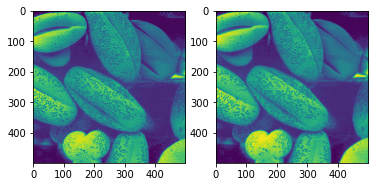

In [64]:
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(convolved_image)
plt.show()

## 6. Laufzeitvergleich für verschiedene Filtergrößen

Vergleichen Sie die Laufzeit der separierten Filterung mit der der 2D-Filterung für verschieden große Filtermasken!

Zur Zeitmessung können Sie die magische Jupyter-Funktion `%time` (pro Zeile) oder `%%time` (pro Zelle) verwenden.

In [65]:
for m in [3, 5, 7]:
    print(f"m = {m}")
    sigma = m / 5
    A_gauss_sep = np.array([[np.exp(- (k**2) / sigma**2)] for k in range(m)], dtype=np.float32)
    A_gauss_sep /= A_gauss_sep.sum()
    A_gauss = np.array([[np.exp(- (h**2 + k**2) / sigma**2) for k in range(m)] for h in range(m)], dtype=np.float32)
    A_gauss /= A_gauss.sum()
    print("Separated")
    %time ex2_convolve(ex2_convolve(image, A_gauss_sep), np.transpose(A_gauss_sep))
    print("Not Separated")
    %time ex2_convolve(image, A_gauss)

m = 3
Separated
CPU times: user 4.63 s, sys: 0 ns, total: 4.63 s
Wall time: 4.62 s
Not Separated
CPU times: user 4.49 s, sys: 0 ns, total: 4.49 s
Wall time: 4.49 s
m = 5
Separated
CPU times: user 5.95 s, sys: 0 ns, total: 5.95 s
Wall time: 5.95 s
Not Separated
CPU times: user 10 s, sys: 7.18 ms, total: 10.1 s
Wall time: 10.1 s
m = 7
Separated
CPU times: user 7.36 s, sys: 0 ns, total: 7.36 s
Wall time: 7.36 s
Not Separated
CPU times: user 18.4 s, sys: 0 ns, total: 18.4 s
Wall time: 18.4 s
